# Numerical Integration

Differential equations describe the relation between an unknown function and its
derivatives. To solve a differential equation is to find a function that
satisfies the relation, typically while satisfying some additional conditions as
well. In this course we will be concerned primarily with a particular class of
problems, called initial value problems. In a canonical initial value problem,
the behavior of the system is described by an ordinary differential equation
(ODE) of the form

\begin{equation}
  \dot{{\bf x}} = f({\bf x}, t)
\end{equation}

where f is a known function ${\bf x}$ is the state of the system, and $\dot{{\bf
x}}$ is ${\bf x}$’s time derivative. Typically, ${\bf x}$ and $\dot{{\bf x}}$
are vectors. As the name suggests, in an initial value problem we are given
${\bf x}(t_0)= {\bf x_0}$ at some starting time $t_0$, and wish to follow ${\bf
x}$ over time thereafter.

In [7]:
# python packages and configurations
# %matplotlib nbagg
%matplotlib inline
from random import uniform
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
# plt.style.use('grayscale')
from scipy.integrate import odeint
from IPython.display import HTML, Video

# utility function
def visualize(t, y, u, analytical_solution):
    t = np.array(t)
    y = np.array(y)
    u = np.array(u)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots(1, 2)
    ax[0].plot(t, analytical_solution(t).real, label='analytical')
    ax[0].plot(t, y, 'x', label='numerical')
    ax[0].set_xlabel('$t (s)$')
    ax[0].set_ylabel('$y (m)$')
    ax[0].set_title('Solution')
    ax[0].legend()
    ax[1].quiver(y[:-1], u[:-1], y[1:] - y[:-1], u[1:] - u[:-1],
                 scale_units='xy', angles='xy', scale=1)
    ax[1].set_xlabel('$y (m)$')
    ax[1].set_ylabel('$u (m / s)$')
    ax[1].set_title('State-space')
    
# utility function
def visualize_analytical(t, analytical_solution, analytical_u):
    t = np.array(t)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.subplots(1, 1)
    
    y_analytical = analytical_solution(t).real
    u_analytical = analytical_u(t).real
    
    ax.quiver(y_analytical[:-1], u_analytical[:-1], y_analytical[1:] - y_analytical[:-1], u_analytical[1:] - u_analytical[:-1],
                 scale_units='xy', angles='xy', scale=1)
    ax.set_xlabel('$y (m)$')
    ax.set_ylabel('$u (m / s)$')
    ax.set_title('State-space')

## Analytical Solution

Let us examine the following second-order ODE that represents a
mass-spring-damper system:

\begin{equation}
  m y'' + d y' + k y =0,\; y(t_0) = y_0, y'(t_0) = u_0
\end{equation}

where $m$, $d$ and $k$ are the mass, spring constant and damping coefficient,
respectively. The analytical solution of this equation is of the following form:

\begin{equation}
  y(t) = A e^{r_1 t} + B e^{r_2 t}
\end{equation}

where $r_1$ and $r_2$ are the roots of the homogeneous equation. Constants $A$
and $B$ are determined such as that the above equation satisfies the initial
conditions.

In [2]:
# model parameters and initial conditions
m = 1.0   # mass
k = 5.0   # spring constant
d = 0.0   # damping coefficient
y0 = -5.0 # initial position 
u0 = 0.0  # initial velocity

# find the roots of the homogeneous equation
roots = sp.solve('m * y**2 + d * y + k', 'y')

# find the constants of the analytical solution
constants = sp.solve(['A + B - y0', 'r1 * A + r2 * B - u0'], 'A', 'B')

# substitute the parameters 
parameters = {'m': m, 'd': d, 'k': k}
r1 = roots[0].subs(parameters)
r2 = roots[1].subs(parameters)
parameters['r1'] = r1
parameters['r2'] = r2
parameters['y0'] = y0
parameters['u0'] = u0
A = constants[sp.symbols('A')].subs(parameters)
B = constants[sp.symbols('B')].subs(parameters)

# calculate the analytical solution as a function of time
t = sp.symbols('t')
analytical_solution = sp.lambdify(t, A * sp.exp(r1 * t) + B * sp.exp(r2 * t))
analytical_u = sp.lambdify(t, A * r1 * sp.exp(r1 * t) + B * r2 * sp.exp(r2 * t))

## Explicit Euler

The simplest numerical method is called explicit Euler. This method computes the
next value of the solution $x(t + dt)$ by taking a step in the derivative
direction

\begin{equation}
  x(t_0 + dt) = x(t_0) + x'(t_0) dt + O(dt^2)
\end{equation}

where $x'(t_0)$ is the first derivative valuated at $t_0$ and $dt$ is the step
size. This is a first-order approximation of the Taylor series. To solve a
second order differential equation, one can apply the Euler method
twice. Assuming that $u(t) = y'(t)$ and $a(t) = y''(t)$ then the problem is
expressed as follows:

\begin{aligned}
   a(t_0) &= -\frac{k}{m} y(t_0) - \frac{d}{m} u(t_0) \\
   u(t_0 + dt) &= u(t_0) + a(t_0) dt \\
   y(t_0 + dt) &= x(t_0) + u(t_0) dt.
\end{aligned}

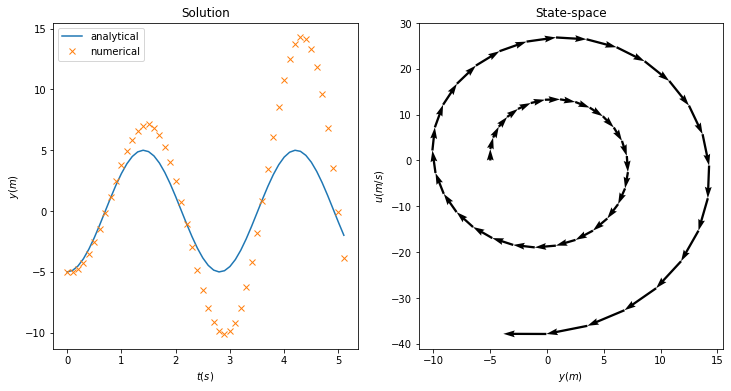

In [3]:
# integration parameters
end_time = 5
dt = 0.1

# solution vectors
t = [0.0]
y = [y0]
u = [u0]

# numerical integration
while t[-1] < end_time:
    t0 = t[-1]
    y_t0 = y[-1]
    u_t0 = u[-1]
    a_t0 = - k / m * y_t0 - d / m * u_t0
    t.append(t0 + dt)
    y.append(y_t0 + u_t0 * dt)
    u.append(u_t0 + a_t0 * dt)

# visualization
visualize(t, y, u, analytical_solution)

1. Explain the meaning of the state-space plot (right subfigure). What should be the expected state-space plot (hint: change visualize function)?
2. Why does the numerical solution diverges from the true solution (hint: Taylor expansion)?
3. What can you do to better approximate the actual solution with this method?

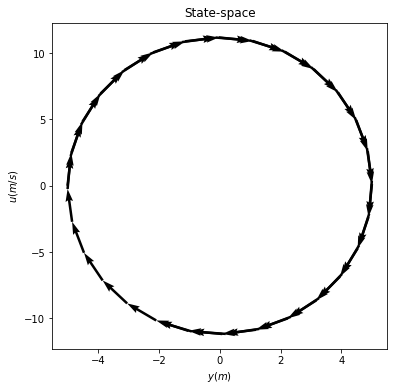

In [8]:
visualize_analytical(t,analytical_solution,analytical_u)

## Answers
1. The state-space plot visualizes the evolution of the velocity with respect to the position, which are the states of the system. The state space plot diverges from the analytical solution. The analytical solution has a plot of a perfect circle. The difference in approximation makes the state-space curve move astray from the perfect circle by a straight line for each timestep.
2. The explicit Euler method performs an approximation based on a first-order Taylor expansion. It only gives the perfect solution for functions with zero second derivative and higher. Error is of order O(dt^2).
3. Error grows linearly with the timestep squared. We can minimize error by minimizing the timestep.

## Semi-implicit Euler

The difference with the standard Euler method is that the semi-implicit Euler
method uses $u(t_0 + dt)$ in the equation for $y(t_0 + dt)$, while the Euler
method uses $u(t_0)$

\begin{aligned}
   a(t_0) &= -\frac{k}{m} y(t_0) - \frac{d}{m} u(t_0) \\
   u(t_0 + dt) &= u(t_0) + a(t_0) dt \\
   y(t_0 + dt) &= x(t_0) + u(t_0 + dt) dt.
\end{aligned}

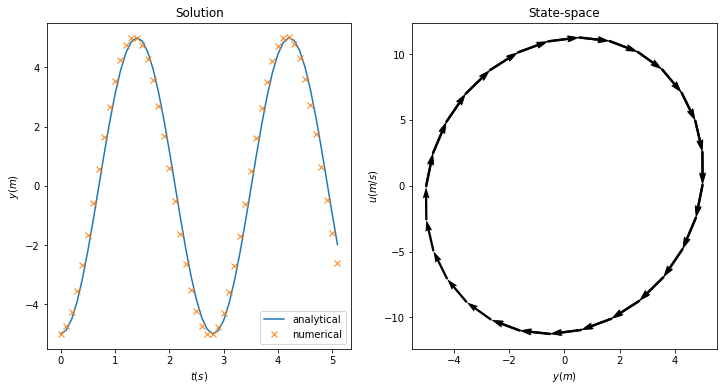

In [20]:
# integration parameters
end_time = 5
dt = 0.1

# solution vectors
t = [0]
y = [y0]
u = [u0]

# numerical integration
while t[-1] < end_time:
    t0 = t[-1]
    y_t0 = y[-1]
    u_t0 = u[-1]  
    a_t0 = - k / m * y_t0 - d / m * u_t0
    u_t0_dt = u_t0 + a_t0 * dt
    t.append(t0 + dt)
    y.append(y_t0 + u_t0_dt * dt)
    u.append(u_t0_dt)
    
# visualization
visualize(t, y, u, analytical_solution)

1. Is this method stable and when?
2. What about the accuracy of the obtained solution?

## Answers
1. Stability: Stability decreases with timestep. For dt>0.9, the method is no longer stable. In fact, the region of stability of the semi-implicit Euler method follows this region:
<img src="stability_semi_implicit_euler.png">
The system is m*s^2 + d*s + k = 0 and its eigenvalues are : s = +/- i*sqrt(20)/2 = +/- i*2.236. Because the eigenvales are pure imaginary, the condition of stability for this method is sqrt(20)/2 < 2/dt --> dt = 0.894. 
2. Semi-implicit Euler is more accurate than the explicit counterpart. Because the state-space diagram follows a elliptic path, error is bounded. However, approximation is not perfect as the state-space diagram follows an elliptic tragectory instead of a circular one. This is due to the fact that semi-implicit Euler relies on future approximations of the derivative values. Since we are approximating the derivative with its future values, the numerical output is time-shifted to the left compared to that of the analytical solution.

## Runge-Kutta of Order 4 (Midpoint Method)

If we were able to evaluate $\ddot{{\bf x}}$ as well as $\dot{{\bf x}}$, we
could achieve $O(dt^3)$ accuracy instead of $O(dt^2)$ simply by retaining one
additional term in the truncated Taylor series:

\begin{equation}
   {\bf x}(t_0 + dt) = {\bf x}(t_0) + \dot{{\bf x}}(t_0) dt + \ddot{{\bf x}}(t_0) \frac{dt^2}{2} + O(dt^3).  \quad \quad (1)
\end{equation}

Recall that the time derivative $\dot{{\bf x}}$ is given by a function $f({\bf
x}(t), t)$. For simplicity in what follows, we will assume that the derivative
function $f$ does depend on time only indirectly through ${\bf x}$, so that
$\dot{{\bf x}} = f({\bf x}(t))$. The chain rule then gives


\begin{equation}
   \ddot{{\bf x}} = \frac{df}{d {\bf x}} \dot{{\bf x}} = f' f.
\end{equation}

To avoid having to evaluate $f'$, which would often be complicated and
expensive, we can approximate the second-order term just in terms of $f$, and
substitute the approximation into Eq. (1), leaving us with $O(dt^3)$ error. To
do this, we perform another Taylor expansion, this time of the function of $f$

\begin{equation}
   f({\bf x}_0 + \Delta {\bf x}) = f({\bf x}_0) + f'({\bf x}_0) \Delta {\bf x} + O(\Delta {\bf x}^2).
\end{equation}

We first induce $\ddot{{\bf x}}$ into this expression by choosing

\begin{equation}
  \Delta {\bf x} = f({\bf x}_0) \frac{dt}{2}
\end{equation}

so that

\begin{equation}
   f({\bf x}_0 + f({\bf x}_0) \frac{dt}{2}) = f({\bf x}_0) + f'({\bf x}_0) f({\bf x}_0) \frac{dt}{2} + O(dt^2) = f({\bf x}_0) + \ddot{{\bf x}}(t_0) \frac{dt}{2} + O(dt^2)
\end{equation}

where ${\bf x}_0 = {\bf x}(t_0)$. We can now multiply both sides by $dt$
(turning the $O(dt^2)$ term into $O(dt^3)$) and rearrange, yielding

\begin{equation}
  \ddot{{\bf x}}(t_0) \frac{dt^2}{2} + O(dt^3) = (f({\bf x}_0 + f({\bf x}_0) \frac{dt}{2}) - f({\bf x}_0)) dt
\end{equation}

Substituting the right hand side into Eq. (1) gives the update formula

\begin{equation}
   {\bf x}(t_0 + dt) = {\bf x}(t_0) + f({\bf x}_0 + f({\bf x}_0) \frac{dt}{2}) dt
\end{equation}

This formula first evaluates an Euler step, then performs a second derivative
evaluation at the midpoint of the step, using the midpoint evaluation to update
${\bf x}$. Hence the name midpoint method. The midpoint method is correct to
within $O(dt^3)$, but requires two evaluations of $f$.

We don’t have to stop with an error of $O(dt^3)$. By evaluating $f$ a few more
times, we can eliminate higher and higher orders of derivatives. The most
popular procedure for doing this is a method called Runge-Kutta of order 4 and
has an error per step of $O(dt^4)$ (the midpoint method could be called
Runge-Kutta of order 2). We won’t derive the fourth order Runge-Kutta method,
but the formula for computing ${\bf x}(t_0 + dt)$ is listed below:

\begin{aligned}
    k_1 &= f({\bf x}_0, t_0) dt \\
    k_2 &= f({\bf x}_0 + \frac{k_1}{2}, t_0 + \frac{dt}{2}) dt \\
    k_3 &= f({\bf x}_0 + \frac{k_2}{2}, t_0 + \frac{dt}{2}) dt \\
    k_4 &= f({\bf x}_0 + k_3, t_0 + dt) dt \\
    {\bf x}(t_0 + dt) &= {\bf x}_0 + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4).
\end{aligned}

In order to express the second-order ODE into a canonical first-order form

\begin{equation}
  \dot{{\bf x}} = f({\bf x}, t)
\end{equation}

one can use the following transformation $x_1 = y$, $x_2 = y'$, $x_1' = x_2$ and $x_2' = y''$. Therefore, the transformed system of equations becomes

\begin{equation}
  \begin{bmatrix}
    \dot{x}_1 \\ \dot{x}_2 
  \end{bmatrix} =
  \begin{bmatrix} 
    x_2 \\ - \frac{k}{m} x_1 - \frac{d}{m} x_2 
  \end{bmatrix} =
  f({\bf x}, t).
\end{equation}

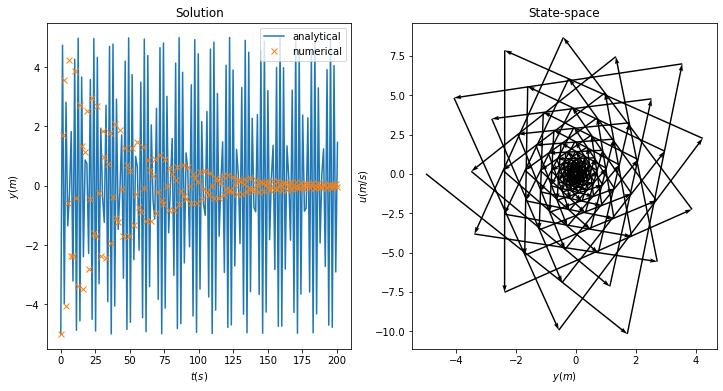

In [38]:
# integration parameters
end_time = 200
dt = 1.26

# solution vectors
t = [0]
x = [[y0, u0]]

# first-order derivative function
def f(x, t):
    return np.array([x[1], -k / m * x[0] - d / m * x[1]])

# numerical integration
while t[-1] < end_time:
    t0 = t[-1]
    x_t0 = np.array(x[-1])
    k1 = f(x_t0, t0) * dt
    k2 = f(x_t0 + k1 / 2, t0 + dt / 2) * dt
    k3 = f(x_t0 + k2 / 2, t0 + dt / 2) * dt
    k4 = f(x_t0 + k3, t0 + dt) * dt
    x.append(x_t0 + 1 / 6.0 * (k1 + 2 * k2 + 2 * k3 + k4))    
    t.append(t0 + dt)

# visualization
x = np.array(x)
visualize(t, x[:, 0], x[:, 1], analytical_solution)

1. What is the error of this method?
2. Do you expect the solution to diverge?

## Answers
1. RK4 has an error of O(dt^4).
2. Solution starts diverging for dt > 1.25. The approximation is not always stable but the range of allowed timesteps is wider than before because the approximation is of higher order. A stable solution does not mean a good approximation. In fact, for dt > 1, approximation gets brought down to zero over time.

## Adaptive Time Stepping

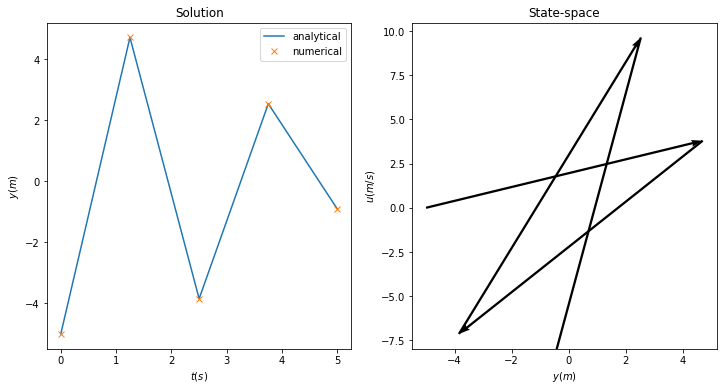

In [43]:
# integration parameters
end_time = 5
t = np.linspace(0, end_time, end_time * 1)
x0 = [y0, u0]

# first-order derivative function
def f(x, t):
    return [x[1], -k / m * x[0] - d / m * x[1]]
    
# numerical integration
x = odeint(f, x0, t)

# visualization
visualize(t, x[:, 0], x[:, 1], analytical_solution)

1. Change the density of the time points in np.linspace. What do you observe?
2. Do you expect the solution to diverge?
3. Which algorithms are supported by odeint?

## Answers
1. The approximation falls into same points as the analytical solution even for very large timesteps.
2. Odeint performs adaptive time stepping in order to obtain stable results. The solution is not expected to diverge independently from the chosen timesteps.
3. Odeint uses LSODA algorithm, which solves the initial value problem for stiff or nonstiff systems of first order ordinary differential equations. Odeint performs adaptive time stepping in addition to the LSODA algorithm.